In [89]:
import datetime # Tipo de dato para fechas y horas
import pandas as pd # Manejo de datos tabulados


In [90]:
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos


In [91]:
import seaborn as sns # Graficos estadisticos
import pandas_profiling as ppr # brinda una super descripción de la data mejor que el pd.describe()


In [92]:
import geopandas as gpd # Pandas para datos geograficos (Mapas!!)
#from fitter import Fitter # Ajuste de distribuciones de probs

In [93]:
%matplotlib inline

In [94]:
df_accidentes=pd.read_csv('Accidentes_transito_peru.csv',encoding='latin-1',sep=";")
#solución de error de lectura de csv usando encoding de stackoverflow:https://es.stackoverflow.com/questions/382281/obtengo-el-error-unicodedecodeerror-utf-8-codec-cant-decode-byte-0xf3-in-po
#el sep=";" me ayuda porque antes no lograba separar columnas y ahora sí se puede.

In [95]:
df_accidentes.head()

,FECHA_CORTE,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20211222,20200101,05:40,LIMA,PE-1S,24,DESPISTE,0,0
1,20211222,20200101,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0,0
2,20211222,20200101,07:45,PASCO,PE-3N,103,DESPISTE,0,1
3,20211222,20200101,18:30,CAJAMARCA,PE-08,111,DESPISTE,0,2
4,20211222,20200101,18:40,LIMA,PE-1N,174,DESPISTE,0,5


In [96]:
df_accidentes.shape

(8155, 9)

In [97]:
df_accidentes['FECHA'].describe

<bound method NDFrame.describe of 0       20200101
1       20200101
2       20200101
3       20200101
4       20200101
          ...   
8150    20210930
8151    20210930
8152    20210930
8153    20210930
8154    20210930
Name: FECHA, Length: 8155, dtype: int64>

In [98]:
df_accidentes['MODALIDAD'].value_counts()

DESPISTE     3829
CHOQUE       3623
ATROPELLO     361
ESPECIAL      186
VOLCADURA     128
N.I.           28
Name: MODALIDAD, dtype: int64

In [99]:
df_accidentes.describe()

,FECHA_CORTE,FECHA
count,8155.0,8.155000e+03
mean,20211222.0,2.020569e+07
std,0.0,4.936680e+03
min,20211222.0,2.020010e+07
25%,20211222.0,2.020073e+07
50%,20211222.0,2.021010e+07
75%,20211222.0,2.021053e+07
max,20211222.0,2.021093e+07


In [100]:
df_accidentes['DEPARTAMENTO'].value_counts()

LIMA             1558
AREQUIPA          795
JUNIN             715
ANCASH            602
PUNO              529
ICA               377
CAJAMARCA         350
CUSCO             346
LAMBAYEQUE        343
LA LIBERTAD       329
PIURA             327
SAN MARTIN        274
APURIMAC          202
MADRE DE DIOS     191
HUANUCO           174
AYACUCHO          168
MOQUEGUA          155
UCAYALI           154
AMAZONAS          152
TACNA             151
LORETO             82
PASCO              77
HUANCAVELICA       62
TUMBES             25
N.I.                7
CALLAO              6
Arequipa            2
Puno                1
Cusco               1
Name: DEPARTAMENTO, dtype: int64

In [101]:
df_accidentes['MODALIDAD'].value_counts()

DESPISTE     3829
CHOQUE       3623
ATROPELLO     361
ESPECIAL      186
VOLCADURA     128
N.I.           28
Name: MODALIDAD, dtype: int64

In [102]:
df_accidentes['CODIGO_VÍA'].value_counts()

PE-1N     1494
PE-1S     1410
PE-3S      652
PE-22      538
PE-3N      477
          ... 
CU-134       1
SM-114       1
PE-109       1
MO-107       1
PE-3SC       1
Name: CODIGO_VÍA, Length: 175, dtype: int64

In [103]:
numeric_columns = df_accidentes.select_dtypes(include=[float]).columns
text_columns = df_accidentes.select_dtypes(include=[object]).columns
date_columns = df_accidentes.select_dtypes(include=['datetime64']).columns

numeric_columns, text_columns, date_columns

(Index([], dtype='object'),
 Index(['HORA', 'DEPARTAMENTO', 'CODIGO_VÍA', 'KILOMETRO', 'MODALIDAD',
        'FALLECIDOS', 'HERIDOS'],
       dtype='object'),
 Index([], dtype='object'))

In [104]:
# Como hay valores tipo texto en las columnas 'FALLECIDOS' y 'HERIDOS' (en la forma de 'n.i'),
# debo reemplazar o quitar esas filas. En este caso, se reemplazara por cero para poder practicar las funciones
# de filtro que encontre aca: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
# Antes me salia esto:    > ValueError: could not convert string to float: 'N.I.'

In [105]:
df_accidentes['FALLECIDOS'].value_counts()

0       7199
1        777
2        111
3         30
4         12
5          7
6          4
N.I.       3
11         3
16         2
7          2
9          1
20         1
18         1
22         1
33         1
Name: FALLECIDOS, dtype: int64

In [106]:
#Verificar qué filas tienen valores "N.I."
df_accidentes['FALLECIDOS']=='N.I'


0       False
1       False
2       False
3       False
4       False
        ...  
8150    False
8151    False
8152    False
8153    False
8154    False
Name: FALLECIDOS, Length: 8155, dtype: bool

In [107]:
#conteo de valores "N.I." en fallecidos
ni_fallecidos=df_accidentes['FALLECIDOS']=='N.I.'
ni_fallecidos.sum(axis=0)

3

In [108]:
#Reemplazar los valores "n.i" por "0" en fallecidos
df_accidentes['FALLECIDOS']=df_accidentes['FALLECIDOS'].replace('N.I.',0)
df_accidentes['FALLECIDOS'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    2
17    2
18    0
19    0
Name: FALLECIDOS, dtype: object

In [109]:
#RE-conteo de valores "N.I." en fallecidos para ver si cambió algo o no
ni_fallecidos=df_accidentes['FALLECIDOS']=='N.I.'
ni_fallecidos.sum(axis=0)

0

In [110]:
#conteo de valores "N.I." en heridos
ni_fallecidos=df_accidentes['HERIDOS']=='N.I.'
ni_fallecidos.sum(axis=0)

10

In [111]:
#Reemplazar los valores "n.i" por "0" en HERIDOS
df_accidentes['HERIDOS']=df_accidentes['HERIDOS'].replace('N.I.',0)
df_accidentes['HERIDOS'].head(20)

0      0
1      0
2      1
3      2
4      5
5      1
6      1
7      1
8      6
9      2
10     0
11     5
12     2
13     0
14     0
15     0
16    16
17     1
18     0
19     3
Name: HERIDOS, dtype: object

In [112]:
#RE-conteo de valores "N.I." en HERIDOS para ver si cambio algo o no
ni_fallecidos=df_accidentes['HERIDOS']=='N.I.'
ni_fallecidos.sum(axis=0)

0

In [113]:
df_accidentes[['FALLECIDOS','HERIDOS']]=df_accidentes[['FALLECIDOS','HERIDOS']].astype(int)

In [114]:
#Acá se verifica que las columnas de heridos y fallecidos estén en formato numérico y entero.

integer_columns = df_accidentes.select_dtypes(include=[int]).columns
text_columns = df_accidentes.select_dtypes(include=[object]).columns
date_columns = df_accidentes.select_dtypes(include=['datetime64']).columns
float_columns = df_accidentes.select_dtypes(include=[float]).columns

integer_columns, text_columns, date_columns,float_columns

(Index(['FECHA_CORTE', 'FECHA', 'FALLECIDOS', 'HERIDOS'], dtype='object'),
 Index(['HORA', 'DEPARTAMENTO', 'CODIGO_VÍA', 'KILOMETRO', 'MODALIDAD'], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'))

In [115]:
#Se elimina la columna fecha corte
#La solución la tomé de este código para el drop: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

df_accidentes=df_accidentes.drop(columns=['FECHA_CORTE'])
df_accidentes

,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20200101,05:40,LIMA,PE-1S,24,DESPISTE,0,0
1,20200101,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0,0
2,20200101,07:45,PASCO,PE-3N,103,DESPISTE,0,1
3,20200101,18:30,CAJAMARCA,PE-08,111,DESPISTE,0,2
4,20200101,18:40,LIMA,PE-1N,174,DESPISTE,0,5
...,...,...,...,...,...,...,...,...
8150,20210930,01:30,ANCASH,PE-1N,348,CHOQUE,0,0
8151,20210930,04:00,MADRE DE DIOS,PE-30C,417,CHOQUE,0,0
8152,20210930,15:10,LA LIBERTAD,PE-1N,627,CHOQUE,0,2
8153,20210930,02:50,LAMBAYEQUE,PE-1N,758,DESPISTE,0,0


In [116]:
# Buscar el número de fila donde hay "N.I." en CODIGO_VÍA.(Para eliminar filas en las que la vía tiene un valor de 'n.i'
index_via=df_accidentes[df_accidentes['CODIGO_VÍA']=='N.I.'].index
index_via

Int64Index([ 282,  309,  311,  317,  326,  328,  331,  340,  342,  352,  359,
             360,  455,  459,  462,  530,  565,  574,  588,  606,  607,  624,
             871,  902, 1227, 1348, 1743, 2252, 3891, 4483, 4525, 4654, 4745,
            4892, 4994, 5008, 5049, 5093, 5107, 5127, 5155, 5553, 5683, 5877,
            5892, 6205],
           dtype='int64')

In [117]:
df_accidentes2=df_accidentes.drop(index_via)
df_accidentes2

,FECHA,HORA,DEPARTAMENTO,CODIGO_VÍA,KILOMETRO,MODALIDAD,FALLECIDOS,HERIDOS
0,20200101,05:40,LIMA,PE-1S,24,DESPISTE,0,0
1,20200101,16:30,CAJAMARCA,PE-3N,74,DESPISTE,0,0
2,20200101,07:45,PASCO,PE-3N,103,DESPISTE,0,1
3,20200101,18:30,CAJAMARCA,PE-08,111,DESPISTE,0,2
4,20200101,18:40,LIMA,PE-1N,174,DESPISTE,0,5
...,...,...,...,...,...,...,...,...
8150,20210930,01:30,ANCASH,PE-1N,348,CHOQUE,0,0
8151,20210930,04:00,MADRE DE DIOS,PE-30C,417,CHOQUE,0,0
8152,20210930,15:10,LA LIBERTAD,PE-1N,627,CHOQUE,0,2
8153,20210930,02:50,LAMBAYEQUE,PE-1N,758,DESPISTE,0,0


In [118]:
# Para cambiar a formato fecha a la columna FECHA

#Esto no funciona porque el formato es YYYYMMDD df_accidentes2['FECHA'] = pd.to_datetime(df_accidentes['FECHA'], format='%d/%m/%Y')

#La solución se extrajo de: https://stackoverflow.com/questions/43133605/convert-integer-yyyymmdd-to-date-format-mm-dd-yyyy-in-python

df_accidentes2[['FECHA_OK']] = df_accidentes2[['FECHA']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))
print (df_accidentes2)

         FECHA   HORA   DEPARTAMENTO CODIGO_VÍA KILOMETRO MODALIDAD  \
0     20200101  05:40           LIMA      PE-1S        24  DESPISTE   
1     20200101  16:30      CAJAMARCA      PE-3N        74  DESPISTE   
2     20200101  07:45          PASCO      PE-3N       103  DESPISTE   
3     20200101  18:30      CAJAMARCA      PE-08       111  DESPISTE   
4     20200101  18:40           LIMA      PE-1N       174  DESPISTE   
...        ...    ...            ...        ...       ...       ...   
8150  20210930  01:30         ANCASH      PE-1N       348    CHOQUE   
8151  20210930  04:00  MADRE DE DIOS     PE-30C       417    CHOQUE   
8152  20210930  15:10    LA LIBERTAD      PE-1N       627    CHOQUE   
8153  20210930  02:50     LAMBAYEQUE      PE-1N       758  DESPISTE   
8154  20210930  18:47           PUNO      PE-3S      1296    CHOQUE   

      FALLECIDOS  HERIDOS    FECHA_OK  
0              0        0  01/01/2020  
1              0        0  01/01/2020  
2              0        1  

In [119]:
modalidad_count=df_accidentes['MODALIDAD'].value_counts()
modalidad_count

DESPISTE     3829
CHOQUE       3623
ATROPELLO     361
ESPECIAL      186
VOLCADURA     128
N.I.           28
Name: MODALIDAD, dtype: int64

<AxesSubplot:>

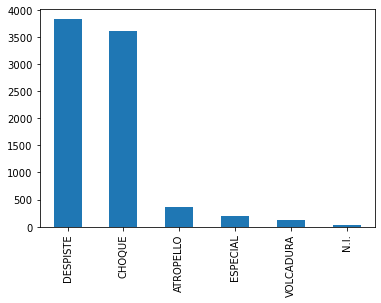

In [120]:
#Para ordenar de mayor a menor se usa sort_values en lugar de sort_index
#Se sacó de acá: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

modalidad_count.sort_values(ascending=False).plot(kind='bar')

In [121]:
departamento_count=df_accidentes['DEPARTAMENTO'].value_counts()
departamento_count

LIMA             1558
AREQUIPA          795
JUNIN             715
ANCASH            602
PUNO              529
ICA               377
CAJAMARCA         350
CUSCO             346
LAMBAYEQUE        343
LA LIBERTAD       329
PIURA             327
SAN MARTIN        274
APURIMAC          202
MADRE DE DIOS     191
HUANUCO           174
AYACUCHO          168
MOQUEGUA          155
UCAYALI           154
AMAZONAS          152
TACNA             151
LORETO             82
PASCO              77
HUANCAVELICA       62
TUMBES             25
N.I.                7
CALLAO              6
Arequipa            2
Puno                1
Cusco               1
Name: DEPARTAMENTO, dtype: int64

<AxesSubplot:>

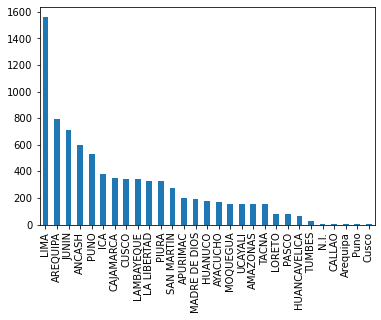

In [122]:
departamento_count.sort_values(ascending=False).plot(kind='bar')

In [140]:
#Conteo de accidentes por departamento y modalidad
conteo_región_x_modalidad=(df_accidentes2[['DEPARTAMENTO', 'MODALIDAD']]
                         .groupby(['DEPARTAMENTO', 'MODALIDAD']).size()
                         .reset_index()
                         .rename({0: 'conteo'}, axis=1))
conteo_región_x_modalidad

#Acá lo ideal sería ordenar la tabla de mayor a menor según el conteo por departamento, aunque eso implica agregar una columna con
# los totales por departamento.
# Revisar esta solución: https://stackoverflow.com/questions/66105989/seaborn-catplot-sort-by-count-column

,DEPARTAMENTO,MODALIDAD,conteo
0,AMAZONAS,ATROPELLO,3
1,AMAZONAS,CHOQUE,67
2,AMAZONAS,DESPISTE,76
3,AMAZONAS,ESPECIAL,2
4,AMAZONAS,N.I.,1
...,...,...,...
129,TUMBES,ESPECIAL,1
130,UCAYALI,ATROPELLO,9
131,UCAYALI,CHOQUE,93
132,UCAYALI,DESPISTE,49


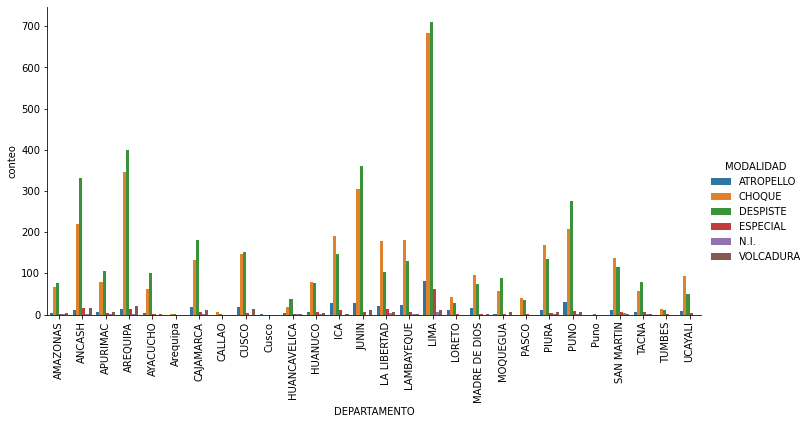

In [141]:
# Gráfica de barras de cantidad de accidentes por departamento y modalidad.
# Si se ordena la tabla anterior, se puede luego ordenar la gráfica que sale de esto.
g = sns.catplot(
    data=conteo_región_x_modalidad, kind="bar",
    x="DEPARTAMENTO", y="conteo", hue="MODALIDAD",
    height=5,aspect=2

)
g.set_xticklabels(rotation=90)
plt.show()

In [ ]:
#Hasta acá me doy que cuenta que aún se pueden hacer las siguientes correcciones o análisis:

- Hay nombres de los departamentose que se repiten en minúsculas
- Aún se pueden eliminar las filas que contienen "n.i." para modalidad 
## Preguntas de investigación:
# 1. ¿Cuál es la región con mayor índice de accidentes fatales?
# 2. 